# 1. Data Understanding

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")

In [2]:
#converting the dataset to pandas dataframe and reading data

loan_df = pd.read_csv("loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#checking number of rows and columns

loan_df.shape

(39717, 111)

In [4]:
#setting display options to see all the fields

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [5]:
#Checking number of null values in each column

loan_df.isnull().sum()

id                                0    
member_id                         0    
loan_amnt                         0    
funded_amnt                       0    
funded_amnt_inv                   0    
term                              0    
int_rate                          0    
installment                       0    
grade                             0    
sub_grade                         0    
emp_title                         2459 
emp_length                        1075 
home_ownership                    0    
annual_inc                        0    
verification_status               0    
issue_d                           0    
loan_status                       0    
pymnt_plan                        0    
url                               0    
desc                              12940
purpose                           0    
title                             11   
zip_code                          0    
addr_state                        0    
dti                               0    


In [6]:
# percentage of missing values in each column

round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                                0.0  
member_id                         0.0  
loan_amnt                         0.0  
funded_amnt                       0.0  
funded_amnt_inv                   0.0  
term                              0.0  
int_rate                          0.0  
installment                       0.0  
grade                             0.0  
sub_grade                         0.0  
emp_title                         6.0  
emp_length                        3.0  
home_ownership                    0.0  
annual_inc                        0.0  
verification_status               0.0  
issue_d                           0.0  
loan_status                       0.0  
pymnt_plan                        0.0  
url                               0.0  
desc                              33.0 
purpose                           0.0  
title                             0.0  
zip_code                          0.0  
addr_state                        0.0  
dti                               0.0  


# 2. Data Cleaning

1. Cleaning missing values
2. Removing null columns
3. Removing redundant columns (Behavioral attributes)
4. Removing outliers

In [7]:
#checking the columns having more than 30% of missing values

missing_values = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 30]
print(missing_values)

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [8]:
#dropping the columns having more than 30% of missing values

loan_df = loan_df.drop(missing_values, axis=1)

In [9]:
#checking the shape of datafrme again

loan_df.shape

(39717, 53)

In [10]:
##checking the unique values in each column

loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
pymnt_plan                    1    
url                           39717
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths                9    
open_acc                    

In [11]:
#dropping columns which has a unique value which does not help in our analysis

for col in loan_df.columns:
    if len(loan_df[col].unique()) == 1:
        loan_df.drop(col, axis = 1, inplace = True)

In [12]:
#checking again if any unique value is present

loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
url                           39717
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths                9    
open_acc                      40   
pub_rec                     

In [13]:
#dropping columns which do not add value to our analysis of target variable i.e. loan status

loan_df= loan_df.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                  'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id','url', 'zip_code','pub_rec_bankruptcies','earliest_cr_line'], axis = 1)

In [14]:
#checking the unique values in each column


loan_df.shape

(39717, 19)

In [15]:
#checking percentage of null values

loan_df.isnull().sum()*100/loan_df.shape[0]

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.191303
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.027696
addr_state             0.000000
dti                    0.000000
dtype: float64

In [16]:
#replacing nan with NA in title and emp_title columns
loan_df.title.fillna("NA", inplace = True)
loan_df.emp_title.fillna("NA", inplace = True)

#removing the rows where emp_length is nan  
loan_df = loan_df[~loan_df['emp_length'].isnull()]

#dropping the rows where home ownership is none as it has only 3 rows
loan_df = loan_df[loan_df['home_ownership'] != 'NONE']

In [17]:
#checking the missing values again 

loan_df.isnull().sum()*100/loan_df.shape[0]

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
title                  0.0
addr_state             0.0
dti                    0.0
dtype: float64

In [18]:
#columns look good now

In [19]:
loan_df.dtypes

loan_amnt              int64  
funded_amnt            int64  
funded_amnt_inv        float64
term                   object 
int_rate               object 
installment            float64
grade                  object 
sub_grade              object 
emp_title              object 
emp_length             object 
home_ownership         object 
annual_inc             float64
verification_status    object 
issue_d                object 
loan_status            object 
purpose                object 
title                  object 
addr_state             object 
dti                    float64
dtype: object

In [20]:

#changing the datatype of int_rate to float and removing %

loan_df.int_rate=loan_df.int_rate.astype(str).str.rstrip('%').astype('float')

In [21]:
#confirming the changes made

loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [22]:
#converting issue_d to date time in pandas and creating derived columns month and year

loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"], format='%b-%y')

loan_df["issue_d_month"] = loan_df["issue_d"].dt.month
loan_df['issue_d_year'] = loan_df["issue_d"].dt.year

loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,issue_d_month,issue_d_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NA,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,12,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,12,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NA,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,12,2011
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,12,2011


#### Outlier treatment

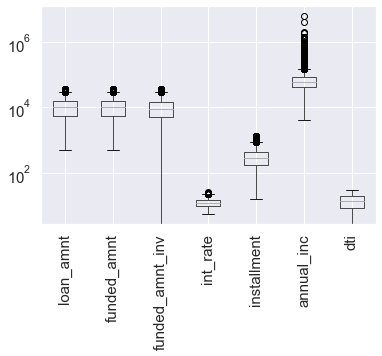

In [23]:
#checking the outliers in continuous variables

plt.yscale('log')
loan_df.boxplot(column = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate", "installment", "annual_inc", "dti"], rot=90, fontsize=15)
plt.show()

<AxesSubplot:xlabel='annual_inc'>

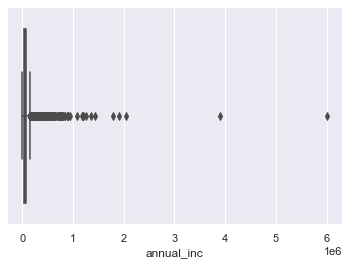

In [24]:
# annual_inc has the most number of outliers

sns.boxplot(loan_df["annual_inc"])

In [25]:
#checking the mean, median and max of annual_inc 

loan_df.annual_inc.describe()

count    3.863900e+04
mean     6.960741e+04
std      6.425455e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319798e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [26]:
#checking the values in each quantile after 95 percentile

loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.96, 0.97,0.98, 0.99])

0.50    60000.00 
0.75    83197.98 
0.90    117000.00
0.95    144000.00
0.96    150000.00
0.97    168000.00
0.98    190000.00
0.99    235000.00
Name: annual_inc, dtype: float64

In [27]:
# max value is approximately 4 times that of mean and median. Removing all the values above 95 percentile. 
# the values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
# So, considering threshold for removing outliers as 0.95

loan_df = loan_df[loan_df["annual_inc"] < loan_df["annual_inc"].quantile(0.95)]
loan_df["annual_inc"].describe()

count    36706.00000 
mean     61649.57145 
std      27815.15972 
min      4000.00000  
25%      40000.00000 
50%      57000.00000 
75%      78495.00000 
max      143500.00000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

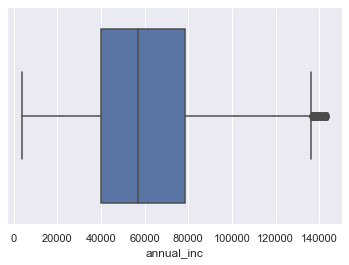

In [28]:
#checking the annual income variation again 

sns.boxplot(loan_df["annual_inc"])

checking potential outliers in other columns

In [29]:
loan_df["installment"].describe()

count    36706.000000
mean     316.119506  
std      199.897488  
min      15.690000   
25%      165.445000  
50%      276.060000  
75%      415.050000  
max      1305.190000 
Name: installment, dtype: float64

In [30]:
loan_df["funded_amnt_inv"].describe()

count    36706.000000
mean     10119.757496
std      6848.557184 
min      0.000000    
25%      5000.000000 
50%      8700.000000 
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

# 3. Analysis

### Univariate Analysis

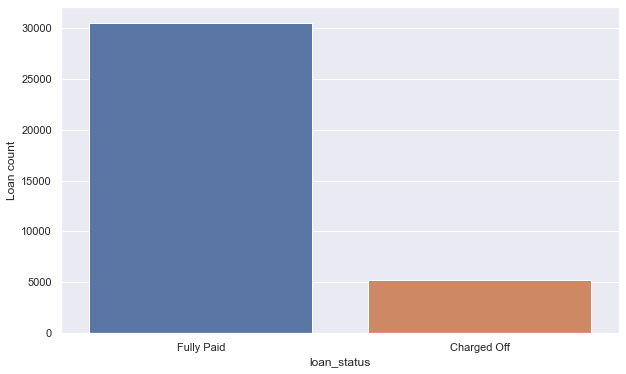

In [31]:
# removing current loans as they do not add up to our analysis
# plotting count plot for loan status


loan_df=loan_df[loan_df.loan_status !='Current']
plt.figure(figsize=(10,6))
a = sns.countplot(x = "loan_status", data= loan_df)
a.set(ylabel = "Loan count")
plt.show()

Number of charged off loans are way lower than the fully paid loans

#### Number of charged off loans for different grades

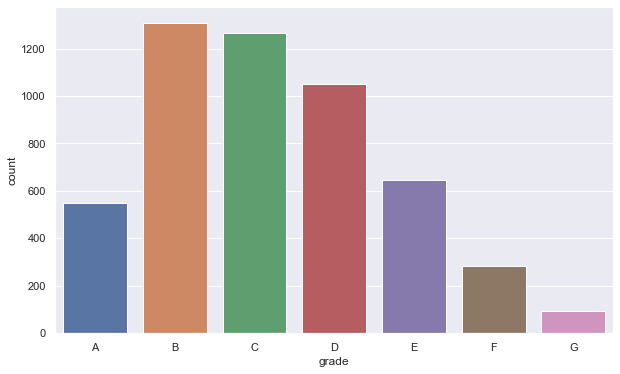

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ["A", "B", "C", "D", "E", "F", "G"])
plt.show()

#### Number of charged off loans for different grades

In [33]:
#creating a new dataframe of charged off loans 

charged_off_df = loan_df[loan_df.loan_status == 'Charged Off']

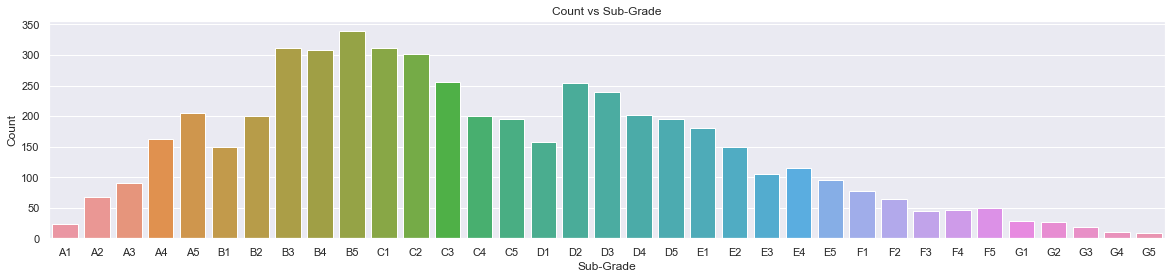

In [34]:
plt.figure(figsize=(20,4))
sns.countplot(x= 'sub_grade', data = charged_off_df, order = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2',
'C3','C4','C5','D1', 'D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])

plt.title('Count vs Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.show()

#### Number of charged off loans for different kind of home ownerships

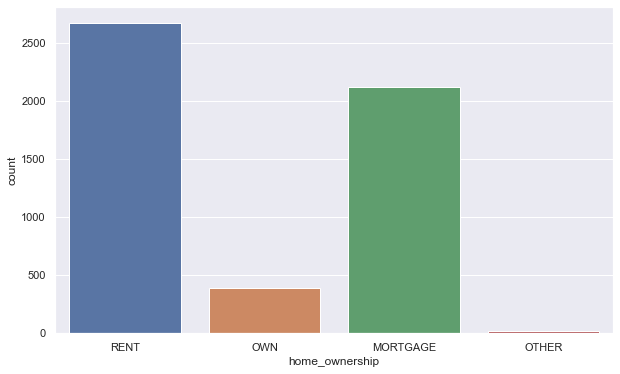

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership', data=charged_off_df)
plt.show()

#### Number of charged off loans for different purposes

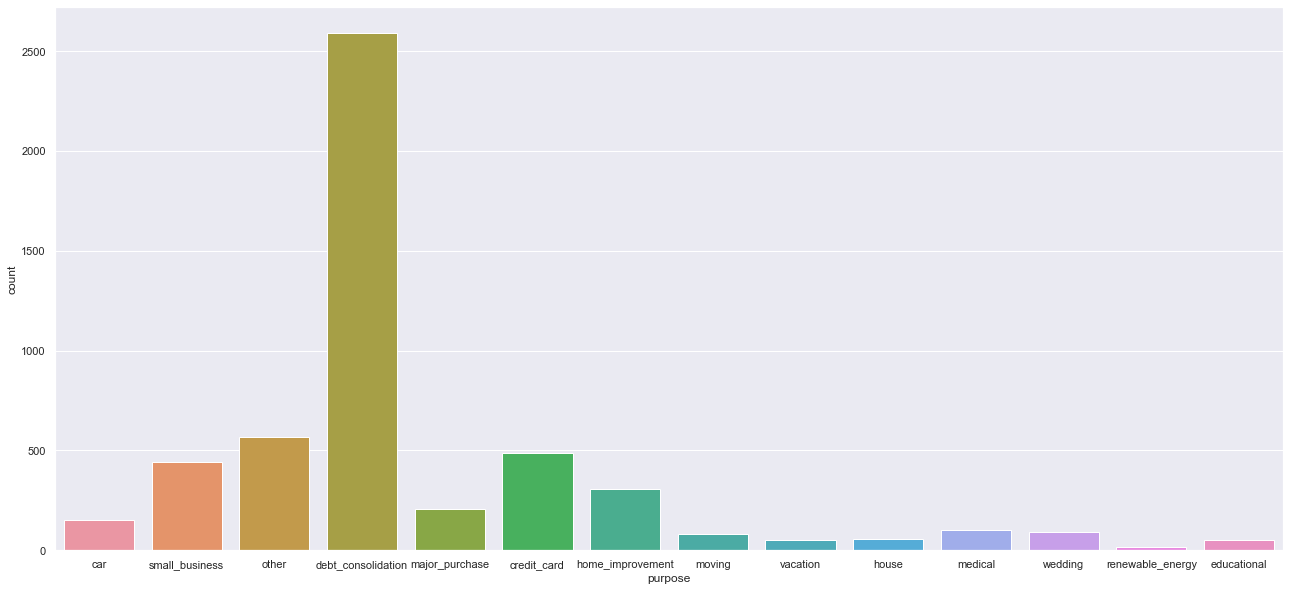

In [36]:
plt.figure(figsize=(22,10))
sns.countplot(x ='purpose', data=charged_off_df)
plt.show()

#### Number of charged off loans for different states

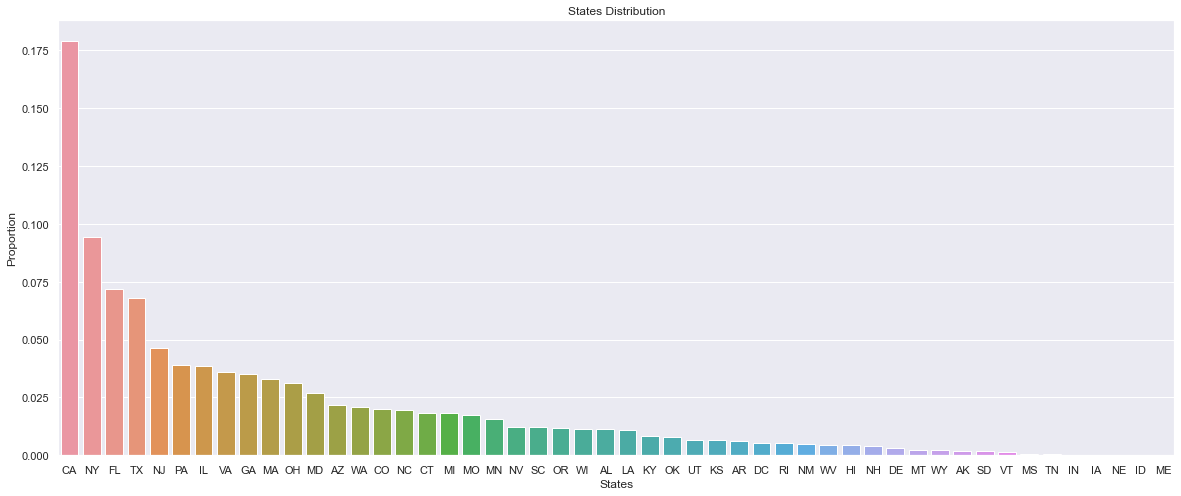

In [37]:
plt.figure(figsize=(20,8))

#Probability  of each values
prob_df = loan_df['addr_state'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='addr_state', data= prob_df)
plt.xlabel('States')
plt.ylabel('Proportion')
plt.title('States'+' Distribution')
plt.show()

#### Number of charged off loans across applicant employment lengths

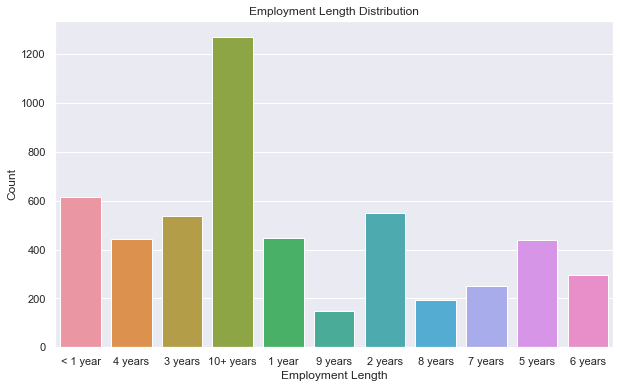

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data=charged_off_df)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Employment Length'+' Distribution')
plt.show()

In [39]:
loan_df.int_rate.describe()

count    35692.000000
mean     11.919936   
std      3.659051    
min      5.420000    
25%      8.940000    
50%      11.710000   
75%      14.350000   
max      24.400000   
Name: int_rate, dtype: float64

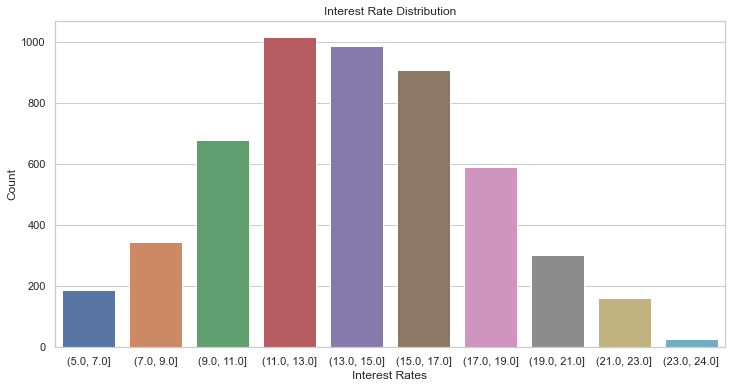

In [69]:
#creating bins for interest rates column

loan_df['int_rate_binned'] = pd.cut(loan_df['int_rate'], bins=10,precision =0)

plt.figure(figsize=(12,6))
sns.countplot(x='int_rate_binned', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rates')
plt.ylabel('Count')
plt.title('Interest Rate'+' Distribution')
plt.show()

In [41]:
loan_df.annual_inc.describe()

count    35692.000000 
mean     61502.386915 
std      27831.730617 
min      4000.000000  
25%      40000.000000 
50%      57000.000000 
75%      78000.000000 
max      143500.000000
Name: annual_inc, dtype: float64

 Binning the continuous variables

In [42]:
loan_df['annual_inc_binned'] = pd.cut(loan_df['annual_inc'], bins=15,precision =0)
loan_df['installment_binned'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['funded_amnt_inv_binned'] = pd.cut(loan_df['funded_amnt_inv'], bins=10) 
loan_df['loan_amnt_binned'] = pd.cut(loan_df['loan_amnt'], bins=10,precision =0)
loan_df['funded_amnt_binned'] = pd.cut(loan_df['funded_amnt'], bins=10,precision =0)
loan_df['dti_binned'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [43]:
loan_df['annual_inc_binned'].value_counts()

(41200.0, 50500.0]      5425
(31900.0, 41200.0]      4924
(59800.0, 69100.0]      4612
(50500.0, 59800.0]      3797
(69100.0, 78400.0]      3520
(22600.0, 31900.0]      3162
(78400.0, 87700.0]      2520
(87700.0, 97000.0]      1967
(97000.0, 106300.0]     1463
(13300.0, 22600.0]      1164
(106300.0, 115600.0]    958 
(115600.0, 124900.0]    844 
(124900.0, 134200.0]    668 
(134200.0, 143500.0]    446 
(3860.0, 13300.0]       222 
Name: annual_inc_binned, dtype: int64

#### Number of charged off loans across different annual income groups

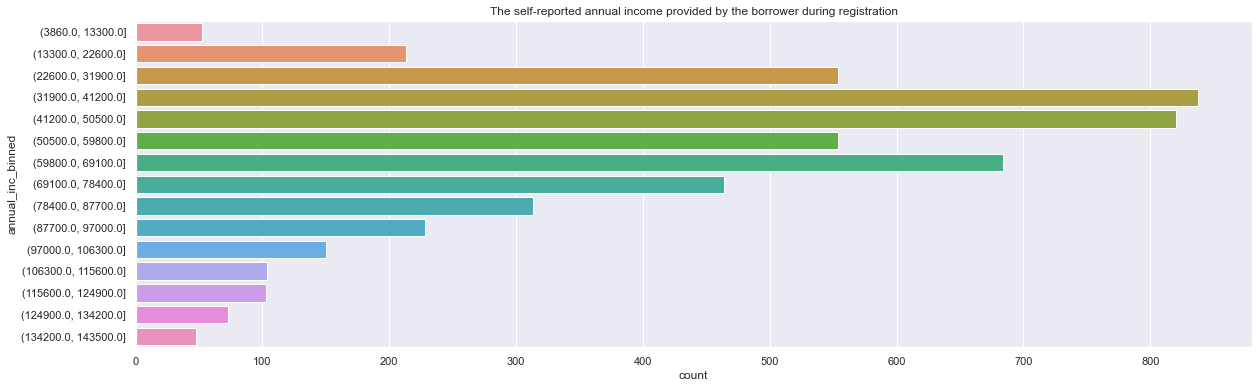

In [44]:
fig, ax = plt.subplots(figsize = (20,6))
sns.countplot(y='annual_inc_binned', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.title('The self-reported annual income provided by the borrower during registration')
plt.show()

#### Number of charged off loans for different months and different year

<AxesSubplot:xlabel='issue_d_year', ylabel='count'>

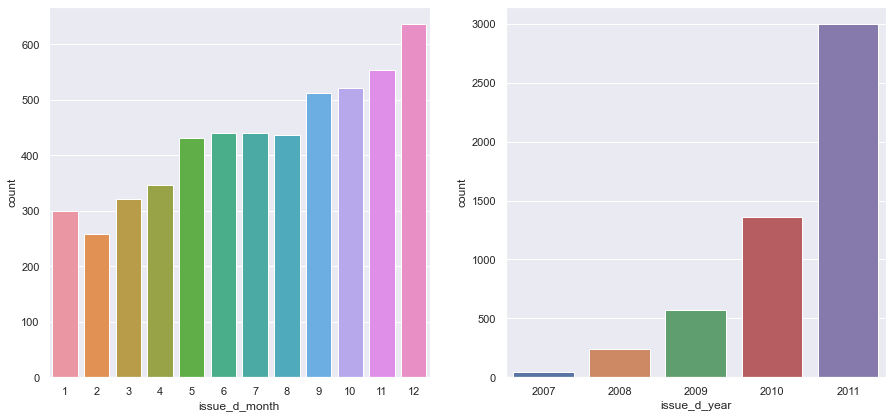

In [45]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### Number of charged off loans for different installment groups

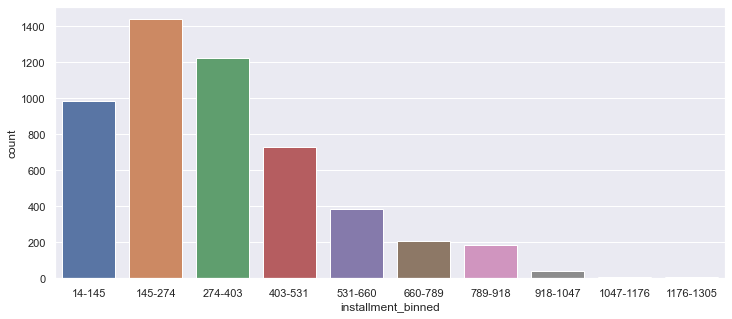

In [46]:
plt.figure(figsize = (12,5))
sns.countplot(x='installment_binned', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

#### Number of charged off loans for loan amount, funded amount and investor funded amount

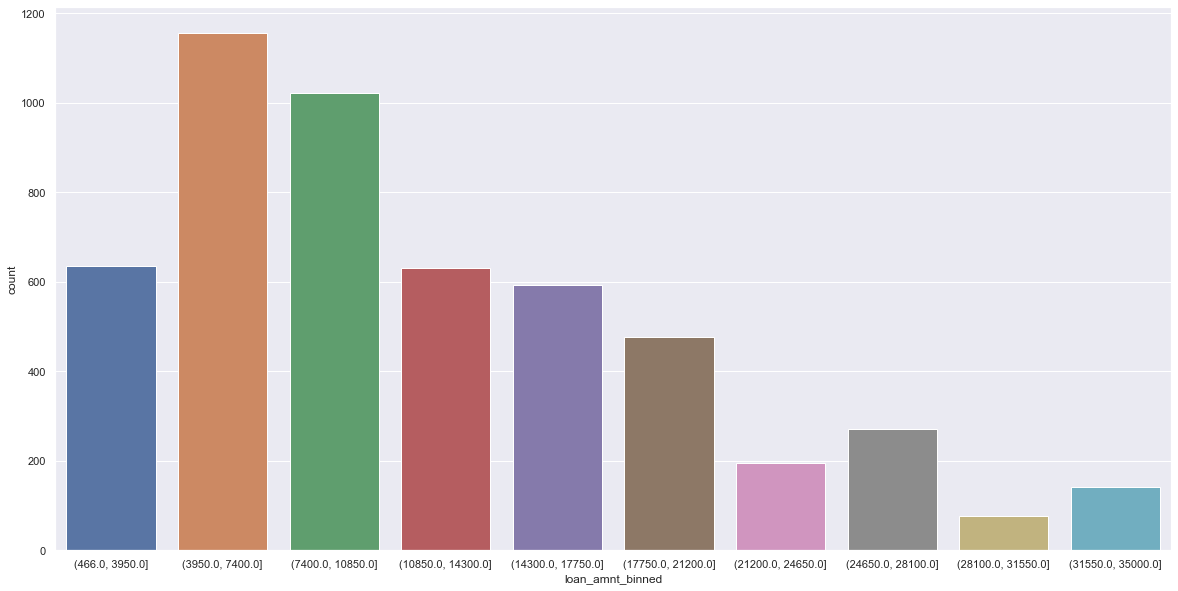

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x='loan_amnt_binned', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

<AxesSubplot:xlabel='count', ylabel='funded_amnt_inv_binned'>

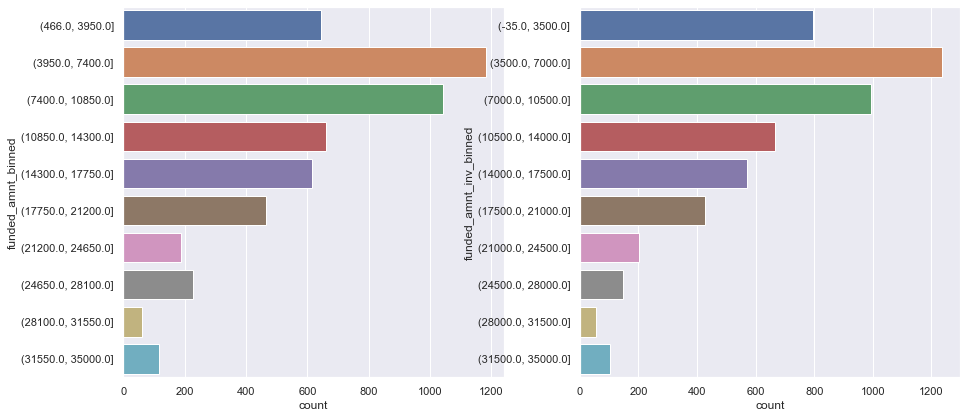

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(y='funded_amnt_binned', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.subplot(222)
sns.countplot(y='funded_amnt_inv_binned', data=loan_df[loan_df.loan_status == 'Charged Off'])

The distribution of loan amount, funded amount and funded amount investor is almost same i.e. we can infer that most of the loans which are charged off are approved and funded by investor

#### Number of charged off loans for different debt to income ratio groups

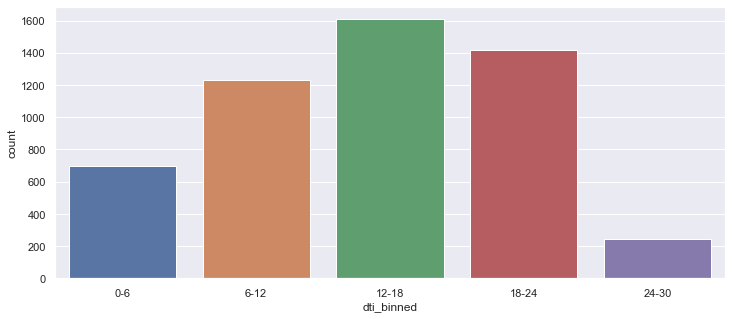

In [49]:
plt.figure(figsize = (12,5))
sns.countplot(x='dti_binned', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

#### Number of charged off loans for different terms

In [50]:
loan_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

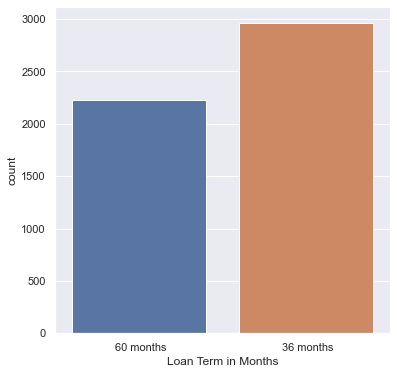

In [51]:
plt.figure(figsize=(6,6))
sns.countplot( x="term", data=charged_off_df)
plt.xlabel('Loan Term in Months')
plt.show()

#### Number of charged off loans for different verification status

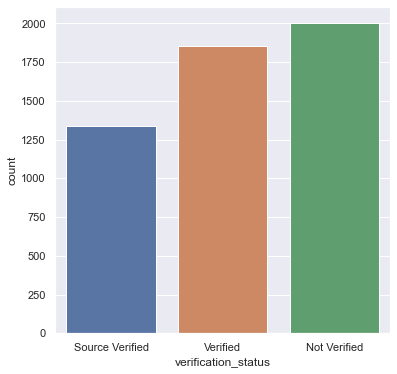

In [52]:
plt.figure(figsize=(6,6))
sns.countplot( x="verification_status", data=charged_off_df)

plt.show()

### Driving factors (or driver variables) behind loan default, i.e., the variables which are strong indicators of default

Summary:

1.	Applicants who have an income of range between 31k – 50k
2.	Applicants with employment length of 10+ years
3.	Applicants who receive interest at the rate of 11-17%
4.	Applicants having house_ownership as 'RENT'
5.	Applicant’s Loan amount and funded amount is between 5k-10k
6.	When the purpose is 'debt_consolidation'
7.	Applicants whose Debt-to-income ratios is between 12-18
8.	When monthly instalments are between 145-274
9.	Applicants with Term of 36 months
10. Charged off count of loan status is higher for the loans issued in December month, may be because of holidays and a festive  time
11.	Applicants from ‘CA’ state tends to default the most
12.	When the loan status is Not verified
13.	Grade is 'B’ And a sub-grade of 'A4' level


# Bi-Variate Analysis

#### Plotting correlation 

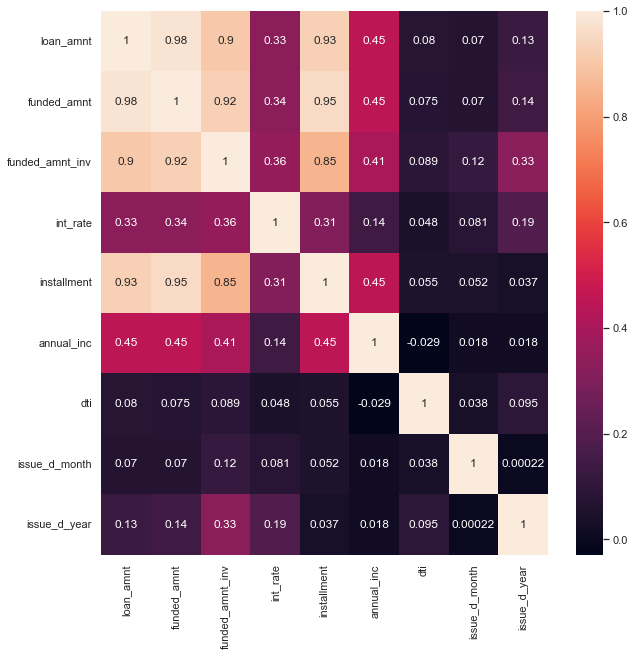

In [53]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
sns.heatmap(charged_off_df.corr(), annot=True)
plt.show()

loan_amnt, funded_amnt, funded_amnt_inv are highly correlated and annual income is negatively correlated with debt-to-income ratio

## Loan Amount

### loan_amnt vs annual_inc

<Figure size 720x432 with 0 Axes>

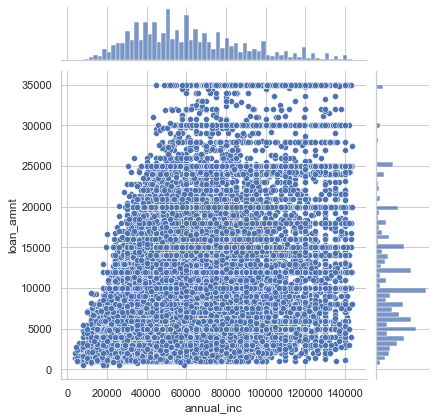

In [54]:
plt.figure(figsize=(10,6))
sns.jointplot('annual_inc','loan_amnt', loan_df.loc[loan_df['annual_inc']<260000])
plt.show()

people with annnual income between 40k-60k taking loans above 25k and higher, which would be risky and chances of default is high 

### loan_amnt vs grade

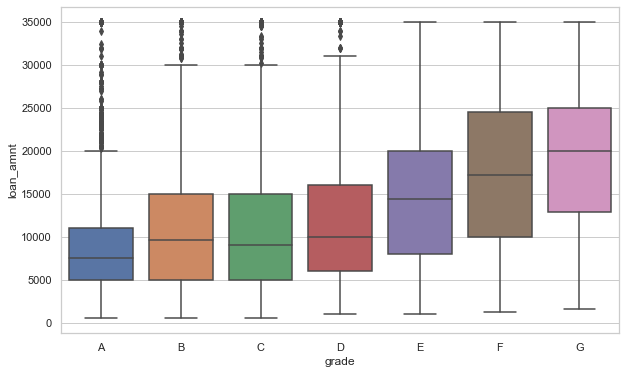

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y = 'loan_amnt', data = loan_df, order = ['A','B','C','D','E','F','G'])
plt.show()

Large the loan amount requested by applicant, lower the grade, the median value of G grade is almost twice that of A, B, C grade 

### loan_amnt vs verification_status and loan status

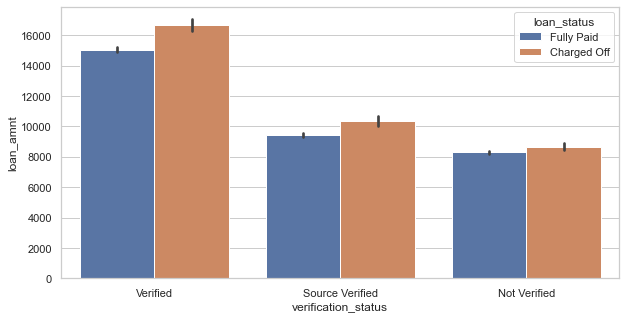

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)
plt.show()

We can confirm that higher the loan amount, higher the chances of loan getting verified by lending club 

### loan amount and home ownership

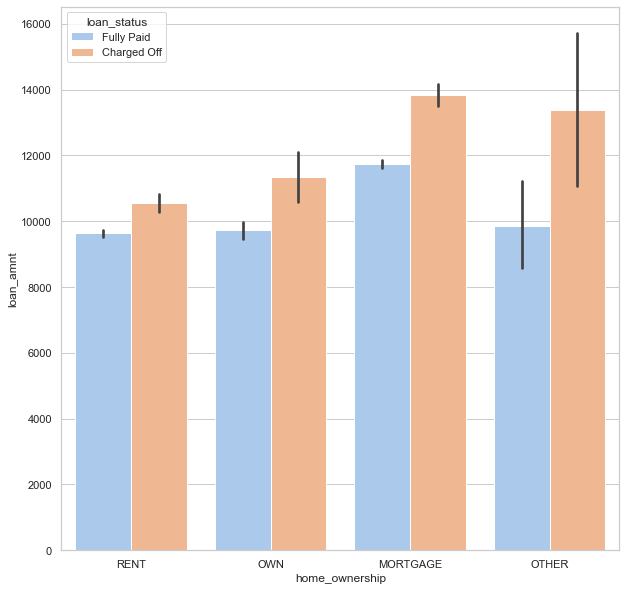

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(y='loan_amnt', x='home_ownership', hue ='loan_status',data =loan_df,palette="pastel")
plt.show()

### Loan amount vs month issued and year issued

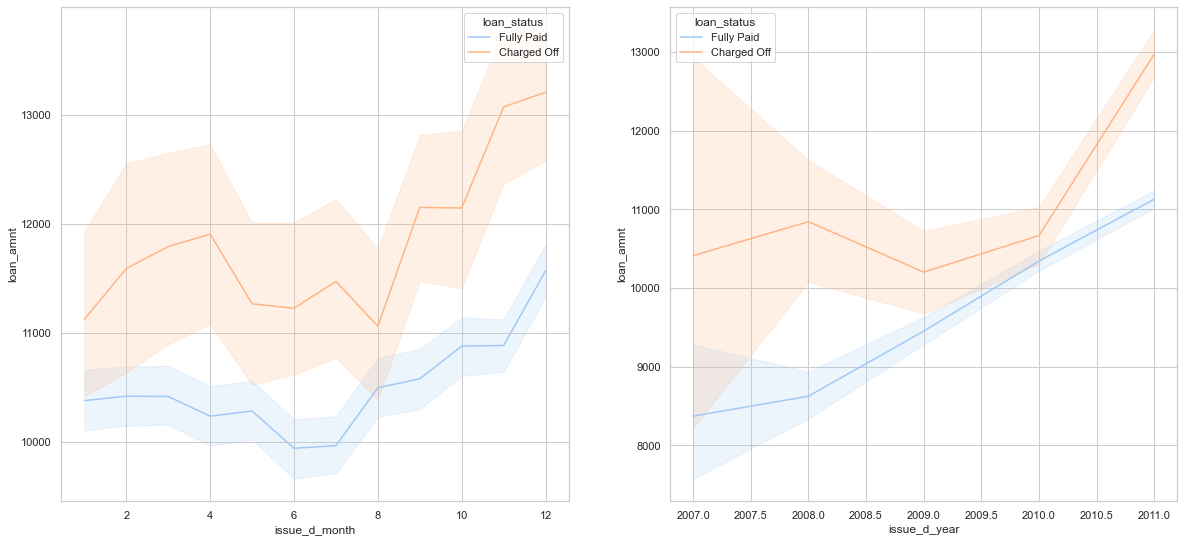

In [58]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_d_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_d_year', hue ='loan_status',palette="pastel")
plt.show()

loan amount requested during and after sub-prime morgage crisis has shown a upward trend of being charged off

### Loan amount vs employee length 

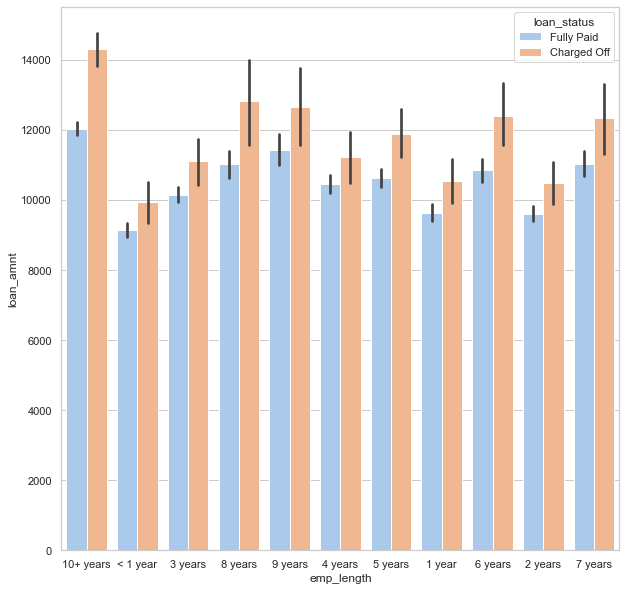

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.show()

People with 10+ years of experience got the loan approved for higher amount

### Loan amount vs int rate

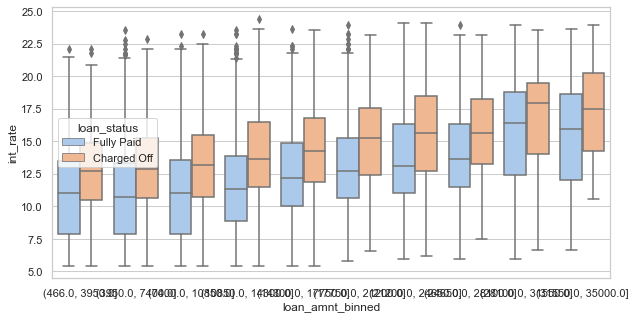

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data =loan_df,y ='int_rate', x ='loan_amnt_binned', hue ='loan_status',palette="pastel")
plt.show()

Interest rate is higher for high loan amounts which can strongly result in loan default

### Loan amount and term

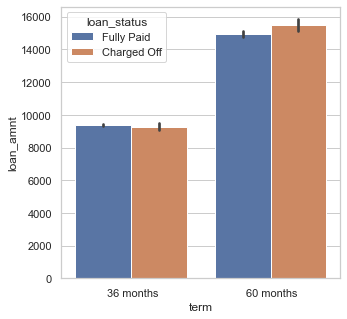

In [61]:
plt.figure(figsize=(5,5))
sns.barplot(x = 'term', y = 'loan_amnt', data = loan_df,hue = 'loan_status')
plt.show()

Applicants who requested more loan_amount tends to take the loan for maximum term i.e. for 60 months

### term and int rate

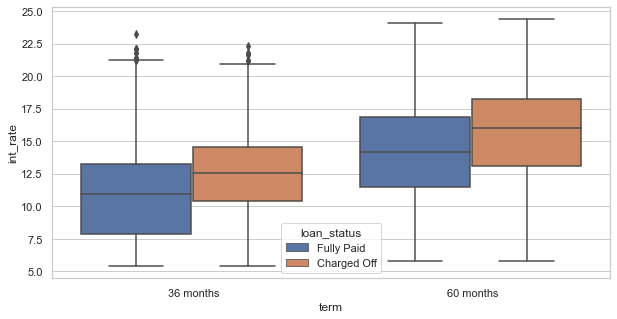

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "term", y = "int_rate", hue = 'loan_status',data = loan_df)
plt.show()

Higher loan amount have higher loan term i.e. 60 months and Higher the term of the loan, higher is the interest rate and chances of default

## Annual Income 

### Annual income vs purpose

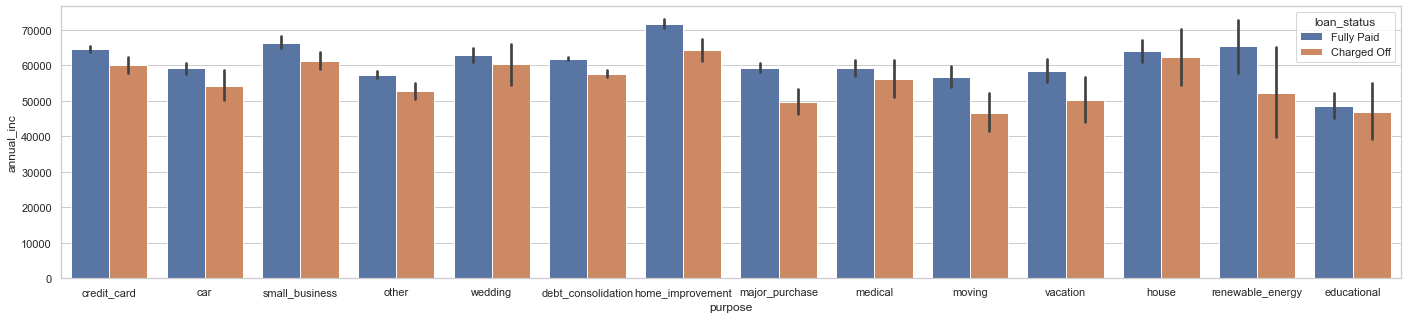

In [63]:
plt.figure(figsize=(24,5))
sns.barplot(x='purpose',y='annual_inc', hue ='loan_status',orient = 'v', data =loan_df)
plt.show()

High annual income applicants whose status is charged off, had tendency to take loan mostly for home improvement, house, credit card, small_business, wedding

As per the univariate analysis of purpose column, number of loans charged off are the highest in number for "debt_consolidation", the annual income of those who applied isn't the highest.

### Annual income vs home ownership

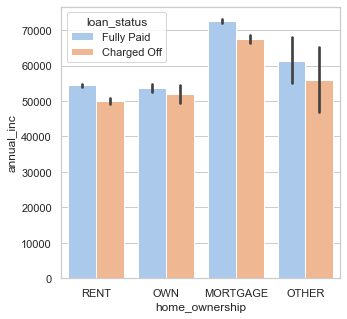

In [64]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Annual Income vs Loan amount

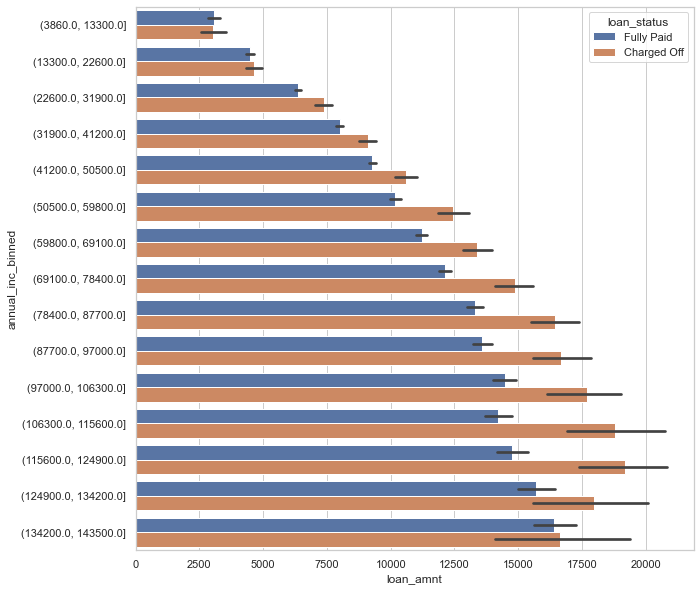

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(y = "annual_inc_binned", x = "loan_amnt", hue = 'loan_status', data = loan_df)
plt.show()

### Annual income vs int_rate

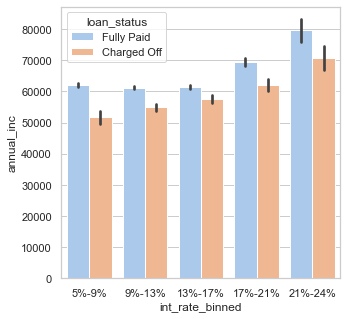

In [66]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_df,x='int_rate_binned', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Bivariate analysis observations and insights from the visaulizations above

Observations:

We must be extra cautious when the - 
1.	Applicant has annual income between 31k-58k are taking loan of 25000 and more, which would be risky and chances of default is high
2.	Status is verified and loan amount above 15000
3.	Applicants whose home ownership is 'MORTGAGE and loan amount is between 12k-14k
4.	employment length is more than 10 years and loan amount is 12k-14k
5.	Applicants who take a loan in the range 30k - 35k and are charged interest rate of approx. 15-20 %
6.	Loans taken for maximum term for higher loan amount in the range of 14k-16k and with high interest rates between 12.5-17.5%
7.	Applicants taking loan for 'home improvement', house, credit card, small business, wedding and has annual income of 60k -70k
8.	Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
9.	Applicants whose annual income is between 112k-140k and loan amount above 17k 
10.	Applicants who receive interest at the rate of 21-24% and have an income of 60k-70k
11.	Applicants who have taken a loan for small business and the loan amount is greater than 14k
12.	Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
